### 3.1. Напишите функцию, строящую круговую диаграмму по странам в общей выручке (revenue) за период. При каждом вызове функция должна обращаться к таблице “revenue” из задания 2, выбирая необходимые данные.

In [1]:
def my_func31(date_start, date_end):
    import psycopg2
    import matplotlib.pyplot as plt

    # Подключаемся к БД:
    conn = psycopg2.connect(dbname='AdHacks', user='postgres',
                            password='111222', host='localhost', port="5433")
    cursor = conn.cursor()

    # Составляем запрос:
    SQL1 = "SELECT country, SUM(revenue) FROM revenue WHERE date BETWEEN '"
    SQL2 = "' AND '"
    SQL3 = "' GROUP BY country;"
    SQL = SQL1 + date_start + SQL2 + date_end + SQL3
    cursor.execute(SQL)
    records = cursor.fetchall()
    cursor.close()
    conn.close()

    #Формируем из выгрузки словарь стран по обхим доходам за период:
    dict1 = {key: value for (key, value) in records}

    #Рисуем круговую диаграмму:
    labels = dict1.keys()
    sizes = dict1.values()

    plt.figure(figsize=(8, 6))
    fig, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',  startangle=90)

    ax1.axis('equal')
    
    plt.show()

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<Figure size 576x432 with 0 Axes>

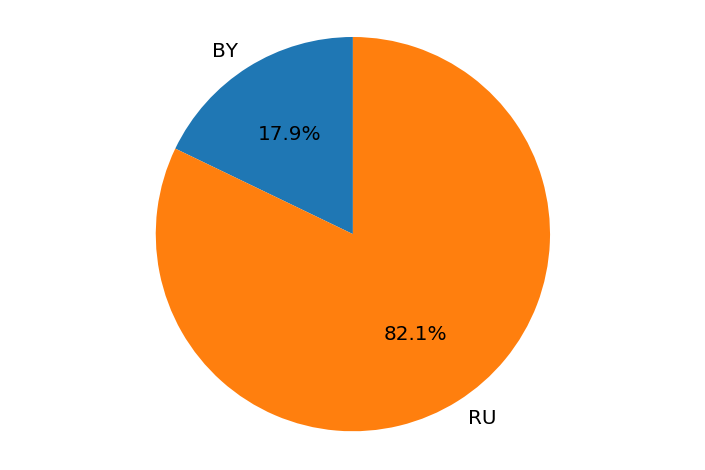

In [3]:
my_func31('2019-02-01', '2019-05-01')